# By K_mean 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:
data1 = pd.DataFrame({
    'X': [1.90, 1.76, 2.32, 2.31, 1.14, 5.02, 5.74, 2.25, 4.71, 3.17],
    'Y': [0.97, 0.84, 1.63, 2.09, 2.11, 3.02, 3.84, 3.47, 3.60, 4.96]
})

data = np.array(data1[['X', 'Y']])


In [3]:
def random_centroid(data, K):
    centroid = random.sample(list(data), K)
    return centroid

def euclidean_dist(data, centroid):
    Distance = np.sqrt(np.sum((data - centroid) ** 2, axis=1))
    return Distance

In [4]:

def choose_point_for_clustering(data, distances):
    clusters = [[] for i in range(len(distances))]
    for k in range(len(data)):
        closest_centroid = 0
        min_distance = distances[0][k]
        for i in range(1, len(distances)):
            if distances[i][k] < min_distance:
                min_distance = distances[i][k]
                closest_centroid = i
        clusters[closest_centroid].append(data[k])
    return clusters

In [5]:

def update_centroid(cluster):
    return np.mean(cluster, axis=0)

In [6]:

def k_mean(K=2, max_iters=100):
    centroids = random_centroid(data, K)
    for i in range(max_iters):
        distances_to_centroids = [euclidean_dist(data, centroid) for centroid in centroids]
        clusters = choose_point_for_clustering(data, distances_to_centroids)
        new_centroids = [update_centroid(cluster) for cluster in clusters]
        if np.all([np.array_equal(centroids[i], new_centroids[i]) for i in range(K)]):
            break
        centroids = new_centroids
    return clusters, centroids

In [7]:

clusters, centroids = k_mean()

for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}:", cluster)
print("Updated Centroids:", centroids)


Cluster 1: [array([5.02, 3.02]), array([5.74, 3.84]), array([2.25, 3.47]), array([4.71, 3.6 ]), array([3.17, 4.96])]
Cluster 2: [array([1.9 , 0.97]), array([1.76, 0.84]), array([2.32, 1.63]), array([2.31, 2.09]), array([1.14, 2.11])]
Updated Centroids: [array([4.178, 3.778]), array([1.886, 1.528])]


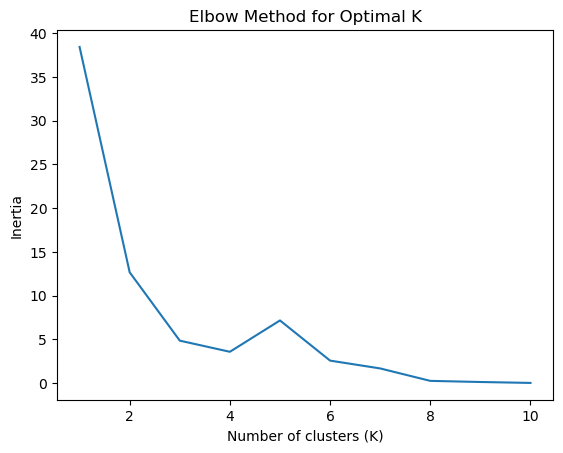

In [8]:

def elbow_method(data, max_K=10):
    inertia = []
    for k in range(1, max_K + 1):
        clusters, centroids = k_mean(K=k)
        inertia_k = sum([min([(point[0] - centroid[0])**2 + (point[1] - centroid[1])**2 for centroid in centroids]) 
                         for point in data])
        inertia.append(inertia_k)
    
    plt.plot(range(1, max_K + 1), inertia)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

elbow_method(data)


# By K-mediod

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random


In [10]:
data1 = pd.DataFrame({
    'X': [1.90, 1.76, 2.32, 2.31, 1.14, 5.02, 5.74, 2.25, 4.71, 3.17],
    'Y': [0.97, 0.84, 1.63, 2.09, 2.11, 3.02, 3.84, 3.47, 3.60, 4.96]
})

data = np.array(data1[['X', 'Y']])


In [11]:
def random_medoid(data, K):
    return random.sample(list(data), K)

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [12]:
def choose_point_for_clustering_medoids(data, distances):
    clusters = [[] for _ in range(len(distances))]
    for k in range(len(data)):
        closest_medoid = 0
        min_distance = distances[0][k]
        for i in range(1, len(distances)):
            if distances[i][k] < min_distance:
                min_distance = distances[i][k]
                closest_medoid = i
        clusters[closest_medoid].append(data[k])
    return clusters

In [13]:
def update_medoid(cluster):
    if len(cluster) == 0:
        return None
    distances = np.zeros(len(cluster))
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            distances[i] += euclidean_distance(cluster[i], cluster[j])
    medoid_index = 0
    min_distance_sum = distances[0]
    for i in range(1, len(distances)):
        if distances[i] < min_distance_sum:
            min_distance_sum = distances[i]
            medoid_index = i
    return cluster[medoid_index]

In [14]:
def k_medoids(K=2, max_iters=100):
    medoids = random_medoid(data, K)
    for i in range(max_iters):
        distances_to_medoids = np.array([np.array([euclidean_distance(point, medoid) for point in data]) for medoid in medoids])
        clusters = choose_point_for_clustering_medoids(data, distances_to_medoids)
        new_medoids = [update_medoid(cluster) for cluster in clusters]
        
        if all(np.array_equal(medoids[i], new_medoids[i]) for i in range(K)):
            break
        medoids = new_medoids
    return clusters, medoids

In [15]:
medoids_clusters, medoids = k_medoids()

for i, cluster in enumerate(medoids_clusters):
    print(f"K-Medoids Cluster {i + 1}:", cluster)
print("Updated Medoids:", medoids)


K-Medoids Cluster 1: [array([1.9 , 0.97]), array([1.76, 0.84]), array([2.32, 1.63]), array([2.31, 2.09]), array([1.14, 2.11]), array([2.25, 3.47])]
K-Medoids Cluster 2: [array([5.02, 3.02]), array([5.74, 3.84]), array([4.71, 3.6 ]), array([3.17, 4.96])]
Updated Medoids: [array([2.32, 1.63]), array([4.71, 3.6 ])]


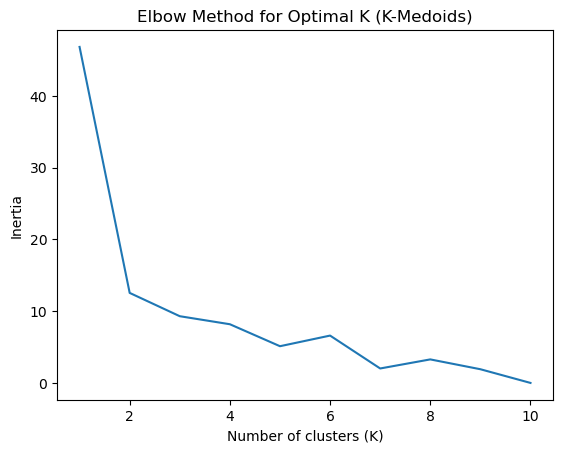

In [16]:
def elbow_method_medoids(data, max_K=10):
    inertia = []
    for k in range(1, max_K + 1):
        clusters, medoids = k_medoids(K=k)
        inertia_k = sum([min([euclidean_distance(point, medoid) ** 2 for medoid in medoids]) for point in data])
        inertia.append(inertia_k)
    
    plt.plot(range(1, max_K + 1), inertia)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K (K-Medoids)')
    plt.show()

elbow_method_medoids(data)


# Final

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

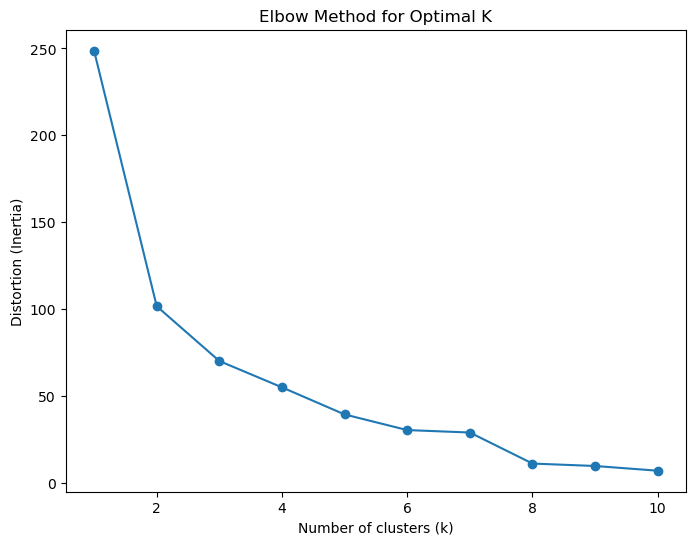

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


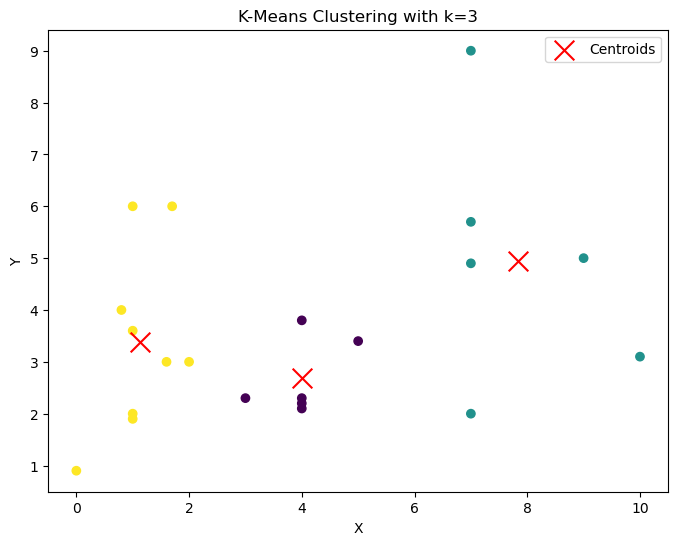

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dataset (given data)
data = np.array([[1, 1.9], [0, 0.9], [7, 2], [1.7, 6], [0.8, 4], [3, 2.3], [1.6, 3], [4, 2.3], 
                 [1, 2.0], [9, 5.0], [4, 2.1], [1, 6], [2, 3.0], [7, 5.7], [4, 3.8], [4, 2.2], 
                 [5, 3.4], [7, 9], [1, 3.6], [10, 3.1], [7, 4.9]])

# Elbow Method to determine the optimal number of clusters
def elbow_method(data, max_k=10):
    distortions = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # inertia is the sum of squared distances to the closest centroid
    
    # Plot the distortion for each k
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.show()

# Applying the Elbow Method to find the optimal number of clusters
elbow_method(data, max_k=10)

# Based on the elbow plot, let's say we select k=3 (for example)
k = 3

# Running K-Means with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Getting the cluster centers and labels (cluster assignments)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the final clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering with k={k}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [2]:
pip install scikit-learn-extra


  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   -------- ------------------------------- 71.7/340.5 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 225.3/340.5 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  337.9/340.5 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


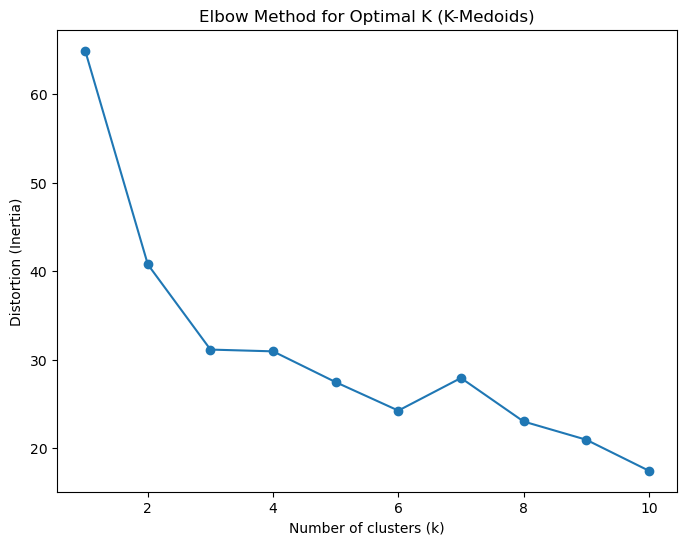

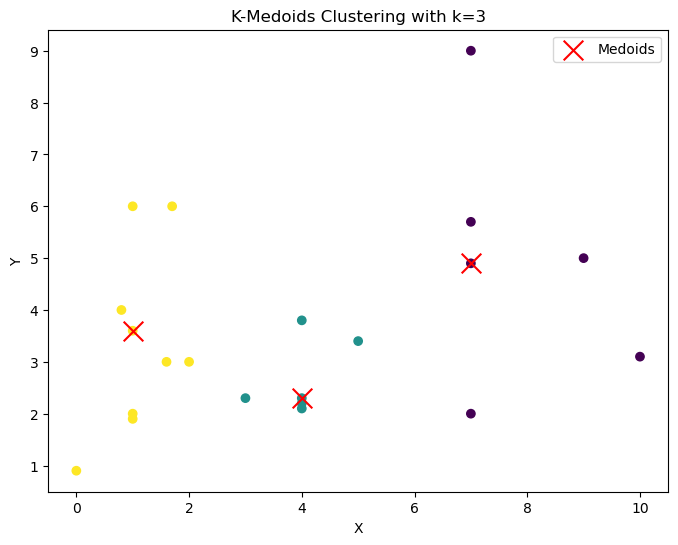

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# Dataset (given data)
data = np.array([[1, 1.9], [0, 0.9], [7, 2], [1.7, 6], [0.8, 4], [3, 2.3], [1.6, 3], [4, 2.3], 
                 [1, 2.0], [9, 5.0], [4, 2.1], [1, 6], [2, 3.0], [7, 5.7], [4, 3.8], [4, 2.2], 
                 [5, 3.4], [7, 9], [1, 3.6], [10, 3.1], [7, 4.9]])

# Elbow Method to determine the optimal number of clusters
def elbow_method(data, max_k=10):
    distortions = []
    
    for k in range(1, max_k + 1):
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        kmedoids.fit(data)
        distortions.append(kmedoids.inertia_)  # Sum of distances of samples to their closest medoid
    
    # Plot the distortion for each k
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal K (K-Medoids)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.show()

# Applying the Elbow Method to find the optimal number of clusters
elbow_method(data, max_k=10)

# Based on the elbow plot, let's say we select k=3 (for example)
k = 3

# Running K-Medoids with the chosen k
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(data)

# Getting the medoid centers and labels (cluster assignments)
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Plot the final clusters and medoids
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='x', s=200, label='Medoids')
plt.title(f'K-Medoids Clustering with k={k}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [18]:
pip install pyclustering



  Using cached pyclustering-0.10.1.2-py3-none-any.whl


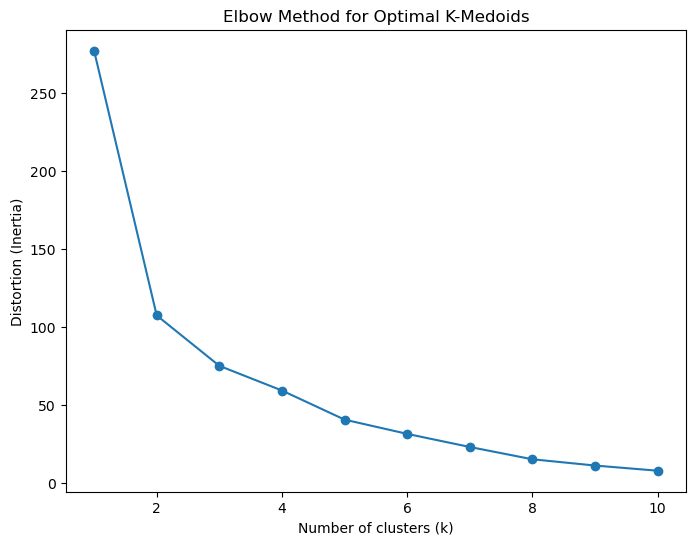

Silhouette Coefficient for K-Medoids: 0.4232


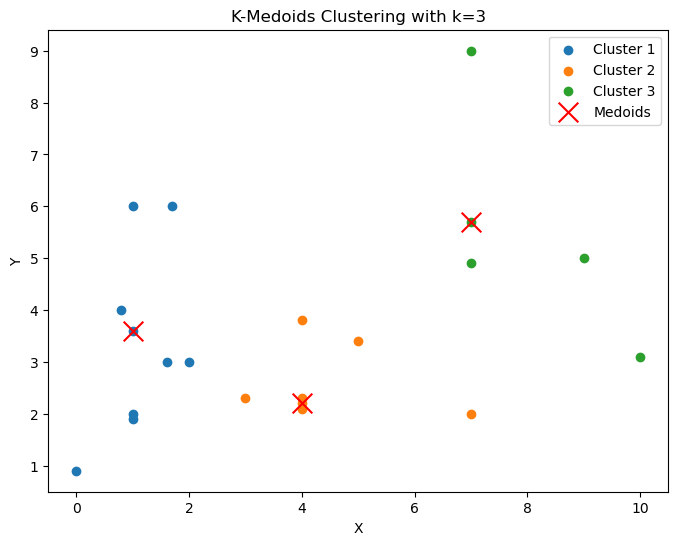

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

# Dataset (given data)
data = np.array([[1, 1.9], [0, 0.9], [7, 2], [1.7, 6], [0.8, 4], [3, 2.3], [1.6, 3], [4, 2.3], 
                 [1, 2.0], [9, 5.0], [4, 2.1], [1, 6], [2, 3.0], [7, 5.7], [4, 3.8], [4, 2.2], 
                 [5, 3.4], [7, 9], [1, 3.6], [10, 3.1], [7, 4.9]])

# Elbow Method to determine the optimal number of clusters for K-Medoids
def elbow_method_kmedoids(data, max_k=10):
    distortions = []
    
    for k in range(1, max_k + 1):
        initial_medoids = np.random.choice(data.shape[0], k, replace=False)  # Random initial medoids
        kmedoids_model = kmedoids(data.tolist(), initial_medoids.tolist())
        kmedoids_model.process()
        medoids = kmedoids_model.get_medoids()  # Medoids of the clusters
        clusters = kmedoids_model.get_clusters()  # Clusters
        distortion = 0
        # Calculate distortion
        for i, cluster in enumerate(clusters):
            for index in cluster:
                distortion += np.linalg.norm(data[index] - data[medoids[i]])**2
        distortions.append(distortion)
    
    # Plot the distortion for each k
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal K-Medoids')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.show()

# Applying the Elbow Method to find the optimal number of clusters
elbow_method_kmedoids(data, max_k=10)

# Based on the elbow plot, assume we select k=3 (for example)
k = 3

# K-Medoids clustering (Built-in)
initial_medoids = np.random.choice(data.shape[0], k, replace=False)  # Random initial medoids
kmedoids_model = kmedoids(data.tolist(), initial_medoids.tolist())
kmedoids_model.process()
medoids = kmedoids_model.get_medoids()  # Medoids of the clusters
clusters = kmedoids_model.get_clusters()  # Clusters

# Calculate the silhouette score for K-Medoids
labels = np.zeros(data.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    for idx in cluster:
        labels[idx] = cluster_idx
silhouette = silhouette_score(data, labels)
print(f"Silhouette Coefficient for K-Medoids: {silhouette:.4f}")

# Plotting K-Medoids clusters
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    cluster_data = np.array([data[idx] for idx in cluster])
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i+1}")
    
# Plot medoids
medoid_data = data[medoids]
plt.scatter(medoid_data[:, 0], medoid_data[:, 1], color='red', marker='x', s=200, label='Medoids')
plt.title(f'K-Medoids Clustering with k={k}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
